CMP7161

# Objectives
In this lab you will:
* Apply univariate data analysis techniques to better understand how individual variables / attributes are distributed
*	Apply basic visualisation techniques to better identify the relationships between variables
* Define the nominal / categorical variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm


[Read more on Colab Autocomplete](https://saturncloud.io/blog/is-it-possible-to-have-autocomplete-in-a-notebook-in-google-colab/)

In [ ]:
# !pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user


[Install Skimpy library](https://pypi.org/project/skimpy/)

In [ ]:
# !pip install skimpy  #Uncomment the cell to install Skimpy library

# Data sets

Before going any further please make sure you have created a CMP7161/datasets folder in Colab and uploaded the following files into it:


  * This can be found within the ["datasets"](https://moodle.bcu.ac.uk/mod/folder/view.php?id=8217579) folder on Moodle

In [4]:
# Downloaded from UCI Machine learning repository
# https://archive.ics.uci.edu/ml/datasets/iris
# "Data Folder" -> iris.data
# "Data Folder" -> iris.names will give us some more data on the attributes

df_iris = pd.read_csv('iris.data', names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

We can use the describe() method to obtain valuable statistical information about data within our data frame. When dealing with numeric values it provides attributes such as:


*   A count of the amount of items for that variable / column
*   The [mean average](https://simple.wikipedia.org/wiki/Mean) for that variable / column
*   The [standard deviation](https://simple.wikipedia.org/wiki/Standard_deviation) of that column
*   The minimum value found within that variable / column
*   The [percentile values](https://simple.wikipedia.org/wiki/Percentile) for that variable / column (25%, 50%, 75%). For more information on percentiles, see [here](https://www.w3schools.com/python/python_ml_percentile.asp)
*   The maximum value found within that variable / column



In [5]:
# Note how there is no description summary for the Species column?
# Why do you think this is?
df_iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# We can include all columns by using the optional argument include with the value 'all'
df_iris.describe(include='all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
df_contact_lenses = pd.read_csv('contact-lenses.csv')
df_contact_lenses.head()

,age,spectacle_prescrip,astigmatism,tear_prod_rate,contact_lenses
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none


In [8]:
# Original download from https://archive.ics.uci.edu/ml/datasets/wine
df_wine = pd.read_csv('wine.csv')
df_wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Low
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Low
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Low
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low


In [9]:
# Derived from the same dataset as: https://data.world/nrippner/titanic-disaster-dataset
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_airbnb = pd.read_csv('airbnb.csv')
df_airbnb.head()

,ID,DATE_DIFF,GENDER,AGE,COUNTRY
0,lsw9q7uk0j,3,FEMALE,46.0,US
1,0d01nltbrs,10,FEMALE,47.0,US
2,a1vcnhxeij,206,FEMALE,50.0,US
3,yuuqmid2rp,2,FEMALE,36.0,US
4,v4d5rl22px,1,FEMALE,33.0,CA


In [11]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# Note that because the dataset has no headers in the file,
# we have to provide the column names manually
df_diabetes = pd.read_csv('indians-diabetes.csv',
                          names=['Pregnancies','Glucose','BloodPressure',
                                 'SkinThickness','Insulin','BMI',
                                 'DiabetesPedigreeFunction','Age','Outcome'])
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df_heart = pd.read_csv('Heart.csv')
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [13]:
df_students = pd.read_csv('StudentsPerformance.csv')
df_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
#https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

# The occupancy data set comes split up into three different files
# datatraining.txt
# datatest.txt
# datatest2.txt
# We can concatenate (join) them together by:
# mapping the read_csv function over each dataframe's file path
# giving us 3 different data frames
# We can then use pd.concat to combine those dataframe together into one
df_occupancy = pd.concat(map(pd.read_csv,
                    ['occupancy_data/datatraining.txt',
                     'occupancy_data/datatest.txt',
                     'occupancy_data/datatest2.txt']))
df_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


# Skimpy - Another Way to Summarize Pandas Dataframes.

Skimpy is a small python package that shows some extended summary results for a dataset.

In [ ]:
#!pip install skimpy

In [19]:
from skimpy import skim
import pandas as pd


ModuleNotFoundError: No module named 'skimpy'

In [20]:
df = pd.read_csv('Heart.csv')

In [ ]:
#  skimpy generates more matrices and histograms about the dataset.
# skim(df)

## Explore the following datasets using skim library
* df_iris

* df_contact_lenses

* df_titanic

* df_airbnb

* df_diabetes

* df_heart

* df_students

* df_occupancy

In [ ]:
#skim(df_iris)

# Statistical Data Types / "Levels" of Measurement
Steven's levels of measure consist of:
*   Nominal / Categorical
*   Ordinal
*   Interval
*   Ratio

Each "level" of measure allows us to apply more arithmetic operators on the data. It also allows us to better understand what the data actually represents and how it can be manipulated appropriately.

For example, treating  "Eye colour" as a **nominal** variable would allow us to check whether two or more eye colours are equal.
Brown = Hazel?
Hazel != Blue?

But we should not be able to make statements such as:
Brown > Hazel
Blue > Brown

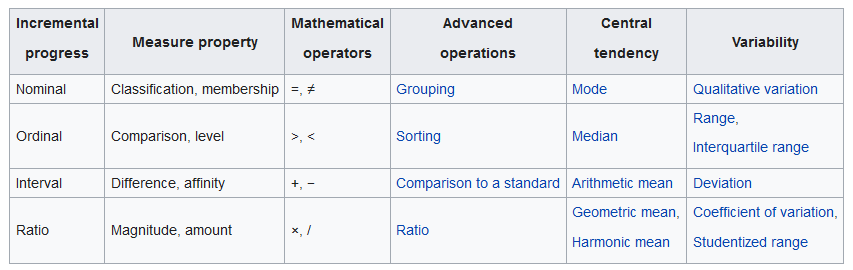



## Qualitative: Nominal
Nominal variables (also referred to as categorical variables) are variables that specify a set of values with no intrinsic order.
Examples of nominal variables could be gender, country, species, and so on.

We can plot nominal variables using a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) which is a type of plot that can be thought of as an alternative to a [histogram](https://simple.wikipedia.org/wiki/Histogram) for categorical variables


In [21]:
df_iris["Species"].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

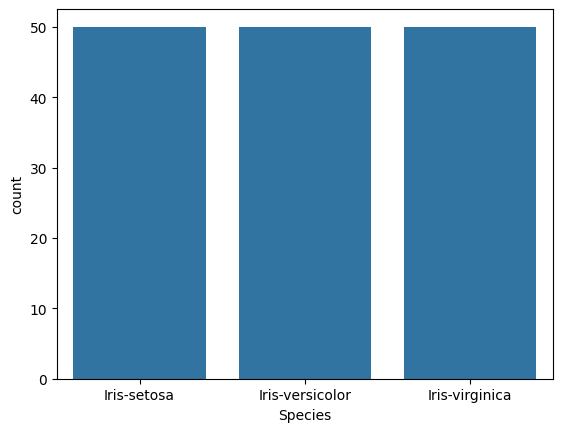

In [22]:
sns.countplot(x ='Species', data=df_iris);

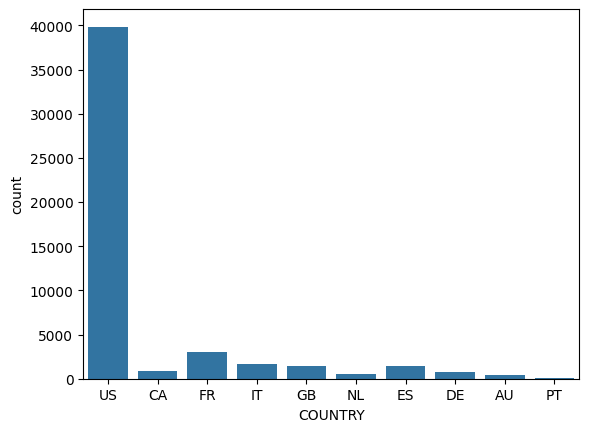

In [23]:
sns.countplot(x = 'COUNTRY', data= df_airbnb);

A special subtype of nominal variable levels are "dichotomous variables", these are variables that only have two possible value.


In [24]:
df_contact_lenses["astigmatism"].head()

0     no
1     no
2    yes
3    yes
4     no
Name: astigmatism, dtype: object

<Axes: xlabel='astigmatism', ylabel='count'>

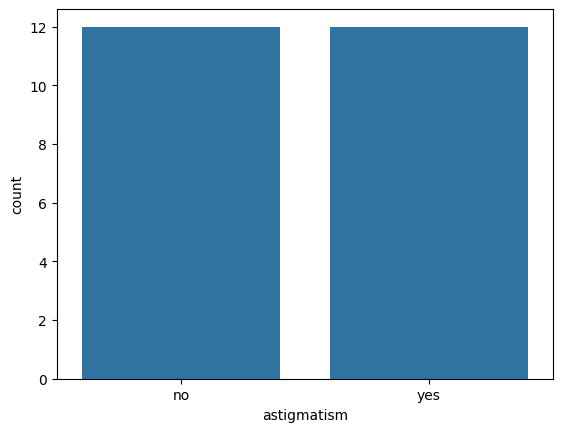

In [25]:
sns.countplot(x = 'astigmatism', data = df_contact_lenses)

<Axes: xlabel='Survived', ylabel='count'>

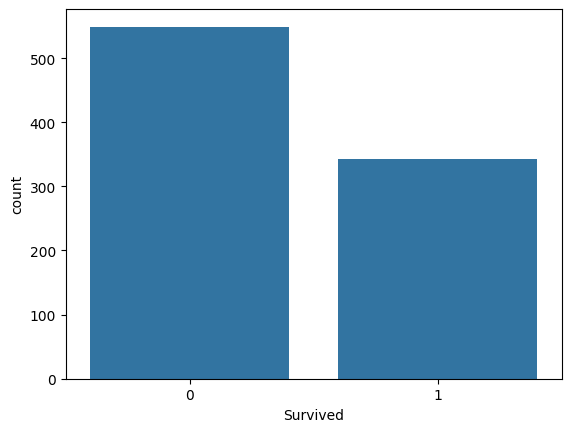

In [26]:

sns.countplot(x = 'Survived', data = df_titanic)

## Qualitative / Quantitative: Ordinal
Ordinal variables contain values that have an inherent **ordering** (e.g. from smallest to largest or from largest to smallest). Each of the values within ordinal variables can be "spaced" unequally, this means that the actual difference between each level is not constant.

For example, say a restaurant provides three sizes of drinks:
1.   Small
  * 300ml
2.   Medium
  * 500ml
3.   Large
  * 750ml

The amount of drink provided in each of the level values is not a constant, the relative difference between **medium** and **large** is greater than the relative difference between **small** and **medium**


<Axes: xlabel='Pclass', ylabel='count'>

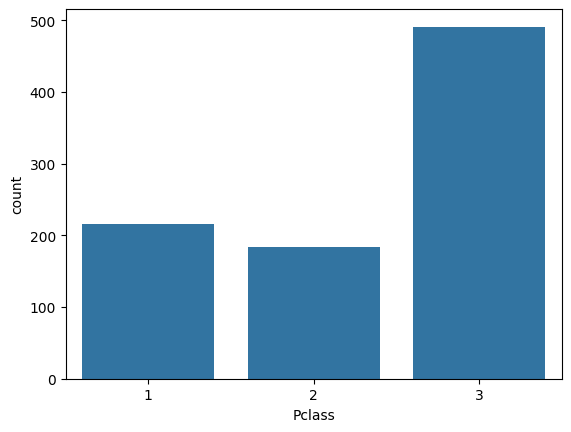

In [27]:
sns.countplot(x = 'Pclass', data = df_titanic)

We can also provide a specific order when countplotting ordinal values that aren't encoded numerically. For examples with levels of education (in the US), we might specify the following order:


1.   Some high school
2.   High school
3.   Some College
4.   Associate's degree
5.   Bachelor's degree
6.   Master's degree




<Axes: xlabel='parental level of education', ylabel='count'>

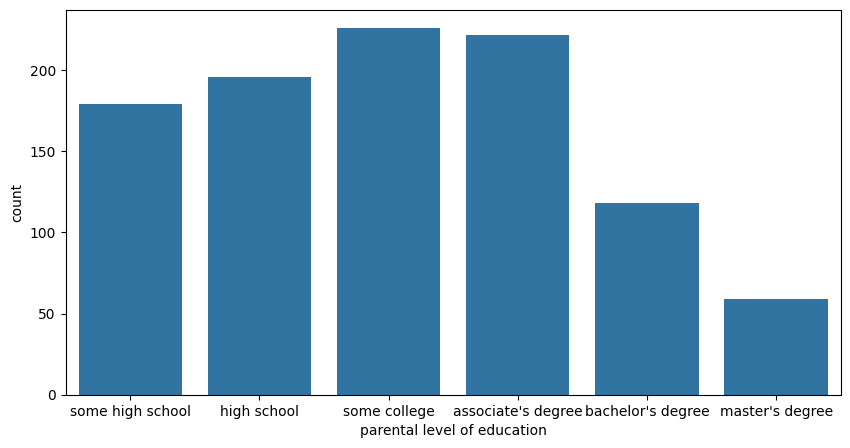

In [28]:
# We'll specify a particular figure size for the plot, so it doesn't get
# bunched up
plt.figure(figsize=(10,5))
sns.countplot(x= 'parental level of education', data = df_students,
              order=['some high school', 'high school',
                     'some college',  "associate's degree",
                     "bachelor's degree", "master's degree" ])

## Quantitative: Interval

Interval variables exist for data which is continuous in nature and has a numerical
value. Take, for example, the daily temperature of a room measured at a particular time (e.g. midday).
Differences between intervals are constant, this means that the difference between 5 Celsius and 2 Celsius is the same as the difference between 10 Celsius and 7 Celsius. We can work out the **mean** and **median** averages of interval variables. However, it is important to note that intervals don’t have a
**"true zero point"**.

### True Zero Point

If a level of measurement has a "true zero point", then that means that a value of 0 represents that you have nothing of that item of interest. Let's take, for example, a variable which represents the number of drinks bought, a
value of 0 will signify that **no drinks were bought**. The "true zero point" is the main way we can discriminate between between quantiative variables to decide whether they are interval or ratio values.

Temperature in celsius or fahrenheit is measured on an **interval scale** this is because a temperature of 0 celsius is not a True Zero Point. So to look at our  [occupancy dataset](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8096164) we can see that Temperature should be an interval variable.

<Axes: xlabel='Temperature', ylabel='Count'>

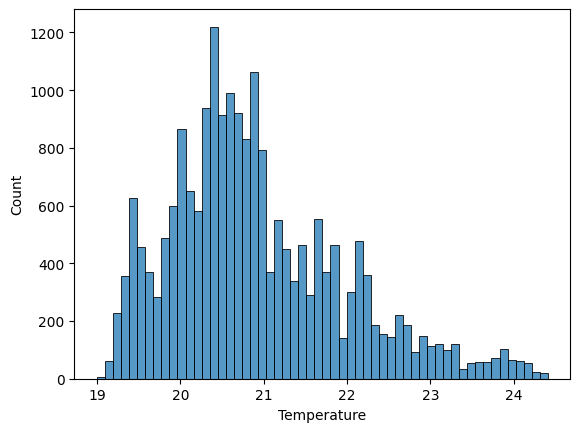

In [29]:
sns.histplot(x ='Temperature', data = df_occupancy)

## Quantitative: Ratio

The most obvious difference between interval and ratio variables are that ratio variables have a **"true zero point"**

Let's compare temperature (in Celsius), with say distance (in Metres) travelled on foot.

0 Celsius does not indicate the **"absence of temperature"** - if it did we would not be able to have valid negative temperatures in Celsius

0 Metres in this case however would indicate an **absence of travelling any distance by foot**

While temperature measured in Celsius or Fahrenheit are both on the Interval scale due to the lack of a **true zero point** the [Kelvin](https://en.wikipedia.org/wiki/Kelvin) temperature scale is measured on a Ratio scale as it has a **true zero point** in Physics this **true zero point** for temperature is referred to as **[Absolute zero](https://simple.wikipedia.org/wiki/Absolute_zero)**


<Axes: xlabel='Age', ylabel='Count'>

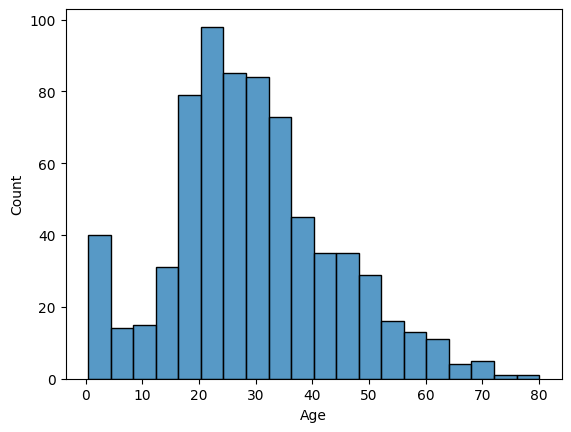

In [30]:
sns.histplot(x='Age', data=df_titanic)
# sns.histplot(x = 'Age', data = df, kde=True) # 'kde': kernel density estimate

<Axes: xlabel='Age', ylabel='Count'>

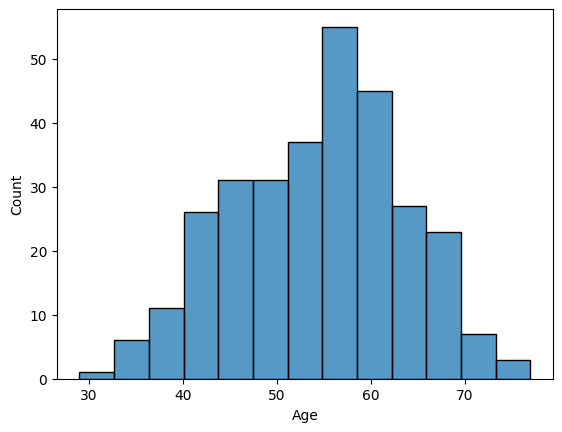

In [31]:
sns.histplot(x='Age', data=df_heart)

<Axes: xlabel='MaxHR', ylabel='Count'>

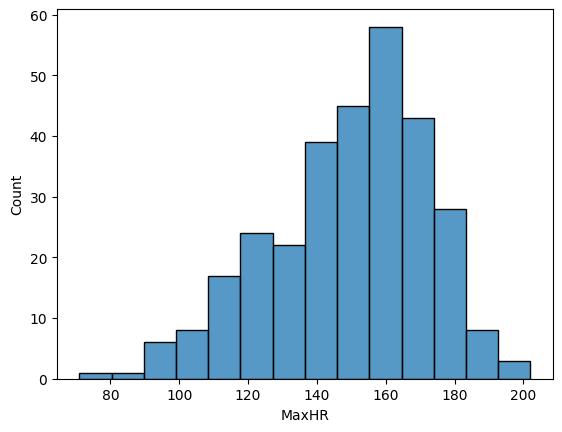

In [32]:
sns.histplot(x = 'MaxHR', data = df_heart)

# Data Distributions

One of the best ways to describe a given variable / attribute in a dataset is to report the values that appear within the dataset for that variable / attribute, along with the amount of times each value appears.

We call this way of describing the variable / attribute the "distribution" of that variable / attribute.

## Histograms

 The most common visual representation of a distribution is a "histogram", which is a chart
that shows the frequency ("count") of each value for that given variable / attribute.

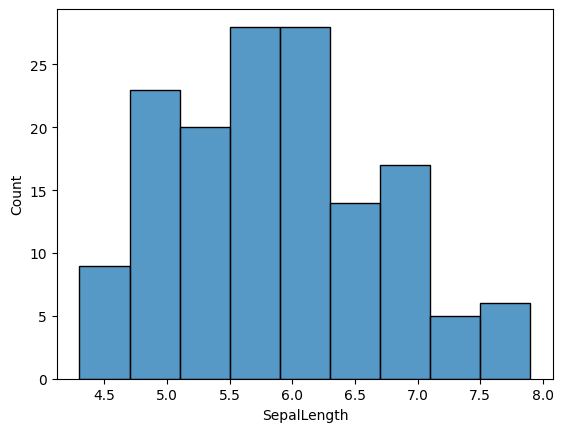

In [33]:
sns.histplot(x = 'SepalLength', data = df_iris);

<Axes: xlabel='SepalLength', ylabel='Count'>

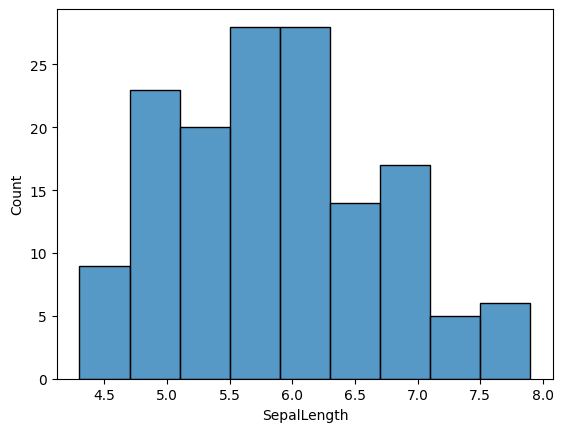

In [34]:
# We can also write the above as:
sns.histplot(df_iris, x="SepalLength")

<Axes: xlabel='SepalWidth', ylabel='Count'>

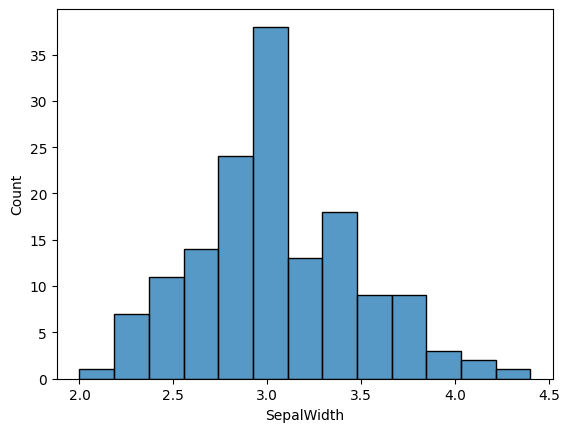

In [35]:
sns.histplot(df_iris["SepalWidth"])

<Axes: xlabel='PetalLength', ylabel='Count'>

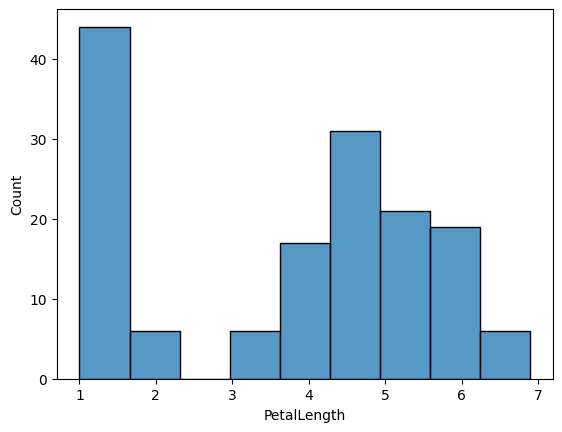

In [36]:
sns.histplot(df_iris["PetalLength"])

<Axes: xlabel='PetalWidth', ylabel='Count'>

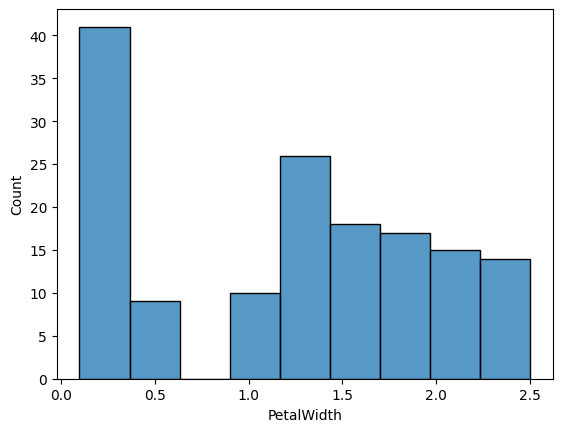

In [37]:
sns.histplot(df_iris["PetalWidth"])

Histograms that deal with a large range of values can also place data from preset ranges into "bins", this is very useful when we have quite a wide range of values. Let's take Passenger 'Age' on the Titanic dataset, we could try to have a count for each individual age value:


*   17
*   18
*   19
*   etc.

Or we could combine values into smaller "sub-ranges" or "bins". For example, going up in 5s we could have the following:

*   0-4
*   4-9
*   10-14
*   15-19
*   20-24
*   etc.

If we went up in 10s, we could have the following

* 0-9
* 10-19
* 20-29
* etc






<Axes: xlabel='Age', ylabel='Count'>

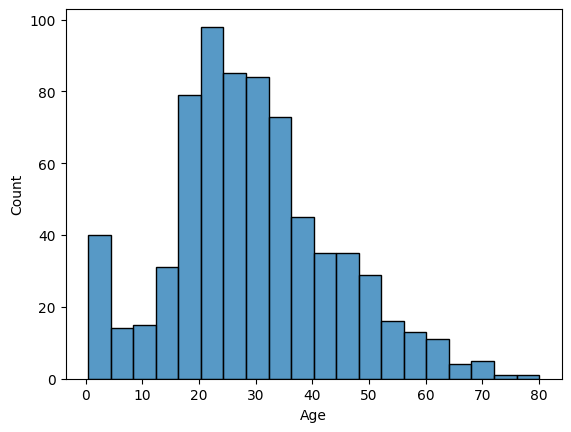

In [38]:
sns.histplot(df_titanic["Age"])

<Axes: xlabel='Age', ylabel='Count'>

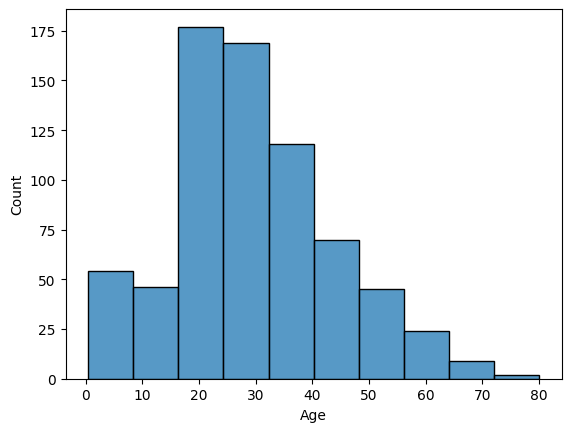

In [39]:
# The bins argument in this case
# specifies the desired amount of bins,
# not their size!
sns.histplot(df_titanic["Age"], bins=10)

## Boxplot

Boxplots (sometimes called "Box and whisker plots" are a standard means of displaying the distribution of data based on a summary consisting of five major points:
* The "minimum" **expected** value, this is not necessarily the smallest value one might find for that variable / attribute
* The first quartile (sometimes called Q1)
* The median
* The third quartile (sometimes called Q3)
* The "maximum" **expected** value, this is not necessarily the largest value one might find for that variable / attribute

"Quartiles" in this case being specific [percentile](https://simple.wikipedia.org/wiki/Percentile) values that are commonly of interest when analysing data. With the 25th, 50th and 75th percentiles being designated as first quartile (Q1), second quartile (median) and third quartile (Q3) respectively.

If you are interested in looking into why the "minimum" and "maximum" expected values are not necessarily the same as the true smallest values in the dataset check out the following article [here](https://builtin.com/data-science/boxplot)

<Axes: ylabel='SepalLength'>

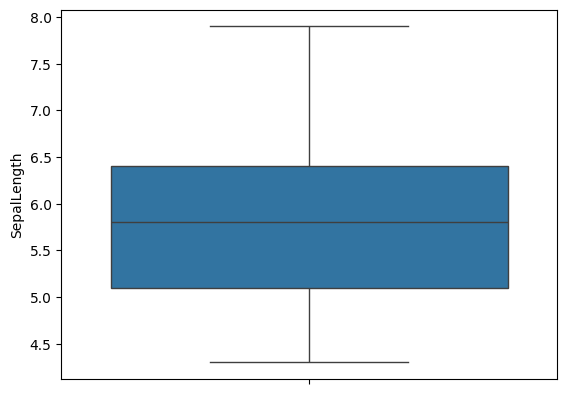

In [40]:
sns.boxplot(df_iris["SepalLength"]) # orient = 'h'


In [41]:
df_iris["SepalLength"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLength, dtype: float64

We can see for the Iris dataset's SepalLength attribute:


*   Q1 (the 25th percentile) is about 5.1 cm
  * 25% of all SepalLengths are less than or equal to 5.1cm
*   Q2 (the median and 50th percentile) is about 5.8 cm
  * 50% of all SepalLengths are less than or equal to 5.8cm
*   Q3 (the 75th percentile) is about 6.5 cm
  * 75% of all SepalLengths are less than or equal to 6.5cm


count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidth, dtype: float64

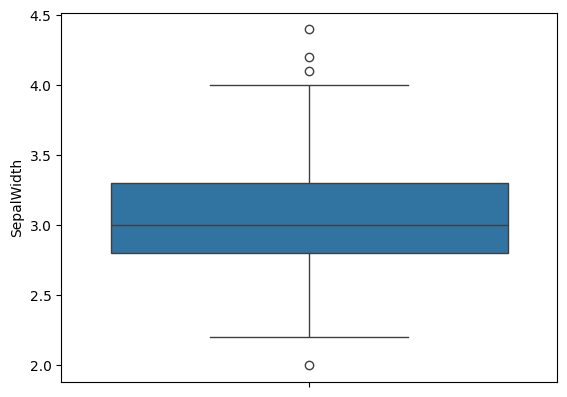

In [42]:
sns.boxplot(df_iris["SepalWidth"])
df_iris["SepalWidth"].describe()

Now things have gotten even more interesting!
The little shapes that we have outside of our boxplots "whiskers" represent "Outliers". These are because they are outside the "minimum" and "maximum" expected range of values for the data.

<Axes: ylabel='PetalLength'>

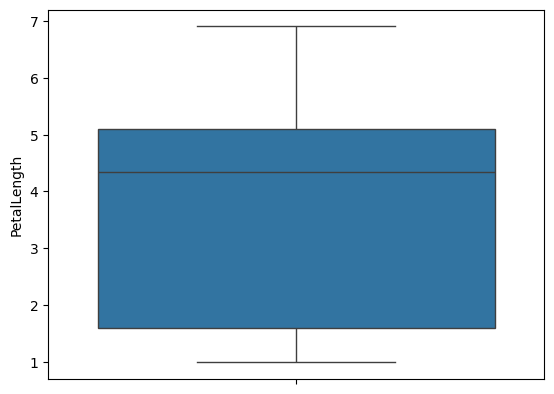

In [43]:
sns.boxplot(df_iris["PetalLength"])

<Axes: ylabel='PetalWidth'>

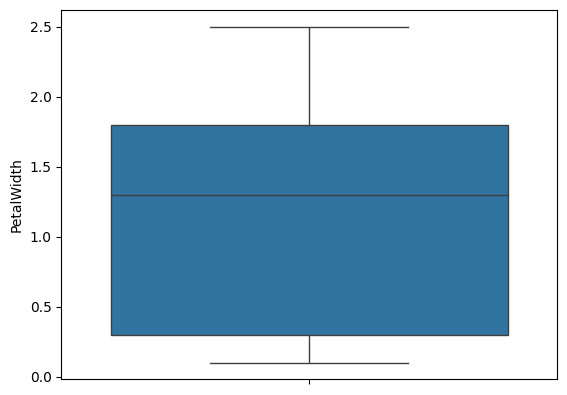

In [44]:
sns.boxplot(df_iris["PetalWidth"])

## The "Normal" distribution

The [normal distribution](https://simple.wikipedia.org/wiki/Normal_distribution), sometimes called the “Bell-curve” or the “Gaussian distribution” based on its discovery by Carl Friedrich Gauss is possibly the most well known of all the distributions of data. While we tend to refer to “the” Normal distribution the fact is that it is actually a family of distributions that have roughly the same shape, each of these individual distributions may have a different size/scale and location. With the standard deviation defining the scale of the distribution whereas the mean defines its location.

# Measures of central tendency and data dispersion

## Measures of central tendency
Mean, Median, Mode

### Mean
The [mean average](https://simple.wikipedia.org/wiki/Mean) is one of the simplest and most common measures used in data analysis. The simplest form of the mean average is the arithmetic mean which is the result of summing all the values of a given variable / attribute together then dividing that by the amount of values.

### Median
The [median average](https://simple.wikipedia.org/wiki/Median) is another simple and common measure used in data analysis. The median can be calculated first by sorting the values from smallest to largest, with an odd amount of values the median can be found at index (n+1) / 2 where n is the amount of values. If there is an even amount of values the median is the mean average of the two elements in the "centre" of the sorted sequence.

### Mode
The modal average is another simple and common measure used in data analysis. The mode is simply the most common value for a given variable / attribute.

<Axes: xlabel='parental level of education', ylabel='count'>

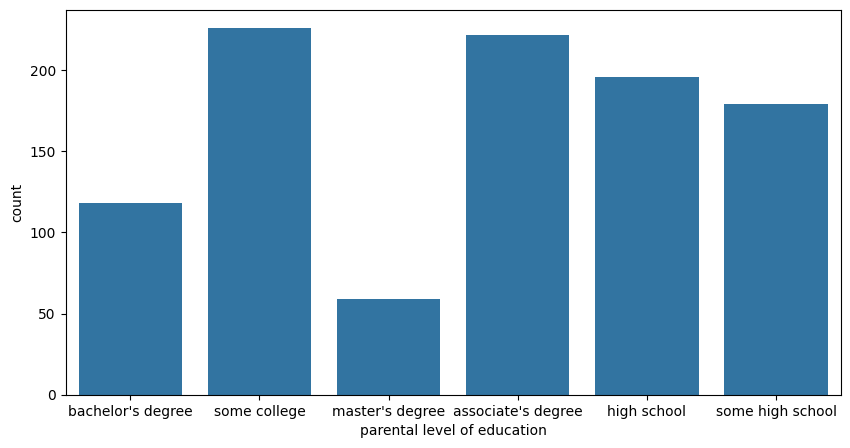

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df_students, x ='parental level of education')

In [46]:
df_students['parental level of education'].mode()

0    some college
Name: parental level of education, dtype: object

## Measures of dispersion
Range, IQR, Variance, Standard Deviation

### Range
Range is the difference between the smallest value of a given variable / attribute and the largest.

### Standard Deviation

The [Standard deviation](https://simple.wikipedia.org/wiki/Standard_deviation) is a measure of data dispersion that allows us to see how individual values are spread out from the mean average. The higher the standard deviation the more that the values are spread out from the mean, while the smaller the standard deviation the more values are found close to the mean.

In [47]:
df_iris['PetalLength'].std()

1.7644204199522626

# Skewness

[Skewness](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/) is a measure of how symmetric (or asymetric) a given distribution is. We can divide skewness into three general groups, positive skewed, symmetric and negative skewed.

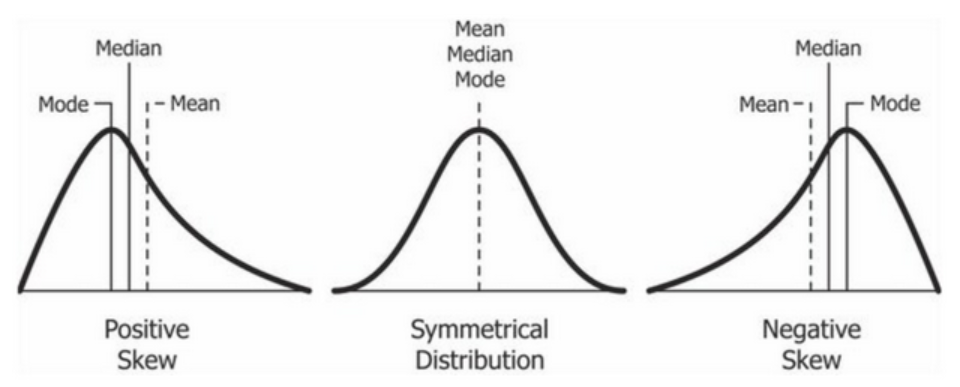

### Positive skew (Right skew)

**skewnorm** takes a real number
 as a skewness parameter When a = 0 the distribution is identical to a normal distribution (norm)

<Axes: ylabel='Count'>

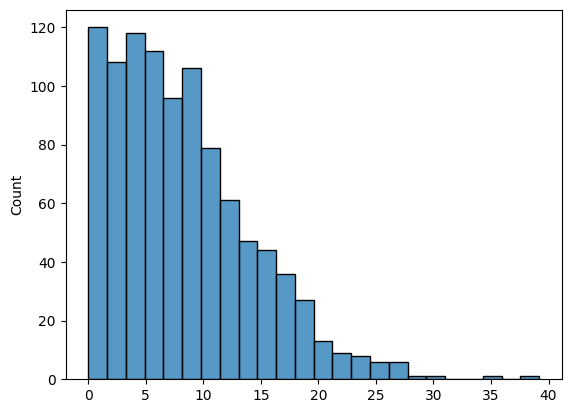

In [48]:
a=150
data= skewnorm.rvs(a, size=1000, scale=10)
sns.histplot(data)

<Axes: xlabel='Age', ylabel='Count'>

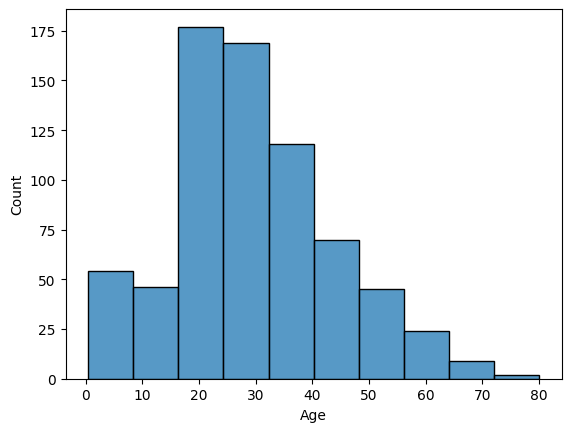

In [49]:
sns.histplot(df_titanic["Age"], bins=10)

In [50]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html
df_titanic["Age"].skew()

0.38910778230082704

### Negative skew (Left skew)

In [51]:
df_heart['MaxHR'].skew()

-0.5374486699106463

<Axes: xlabel='MaxHR', ylabel='Count'>

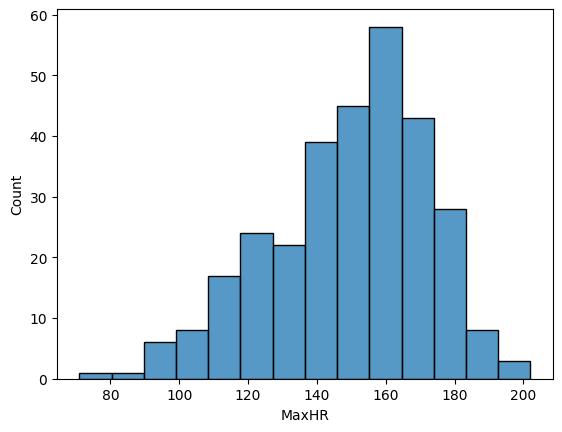

In [52]:
sns.histplot(df_heart['MaxHR'])

# Exercises

## Question: Datasets
Why might it be more appropriate to plot the distribution of Species for the iris dataset (along with similar variables like it) with a countplot rather than a histogram?

### Sample answer

* A count plot is more appropriate for this data set than a histogram as the result is categorical. The result data is separated into classes. A histogram is more appropriate for continuous data, where we need to check the spread of values for a given attribute.

*   The level of measure for 'Species' is nominal therefore we are not plotting the distribution of a quantitative variable but instead looking for the relative counts of each category, thus making a countplot the more appropriate choice

* A count plot is more appropriate for this data set than a histogram as the result is categorical. The result data is separated into classes. A histogram is more appropriate for continuous data, where we need to check the spread of values for a given attribute.




<Axes: xlabel='Species', ylabel='count'>

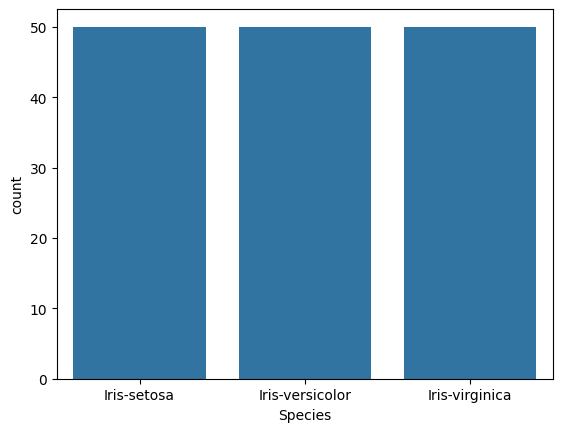

In [53]:
sns.countplot(df_iris , x = "Species")

## Question: Datasets

Choose at least 3 variables which we have not yet visualised from each of the datasets we have used in this lab. Where appropriate create relevant countplots, histograms and boxplots using Python's seaborn library

#### Data Set 1 - Heart

In [56]:
df_heart = pd.read_csv('Heart.csv')
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


<Axes: xlabel='RestBP', ylabel='Count'>

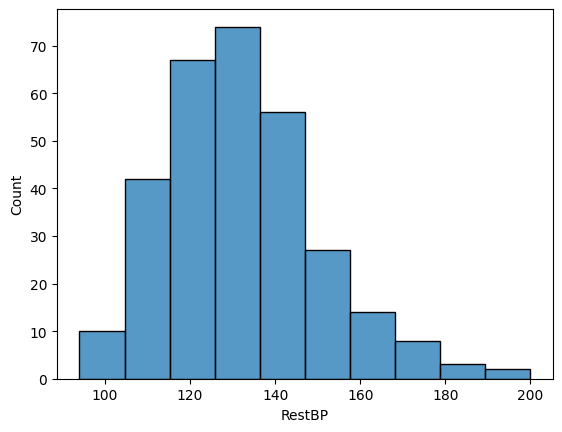

In [55]:
sns.histplot(df_heart["RestBP"], bins=10)

In [57]:
df_heart["RestBP"].skew()

0.7060346498131783

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: Chol, dtype: float64

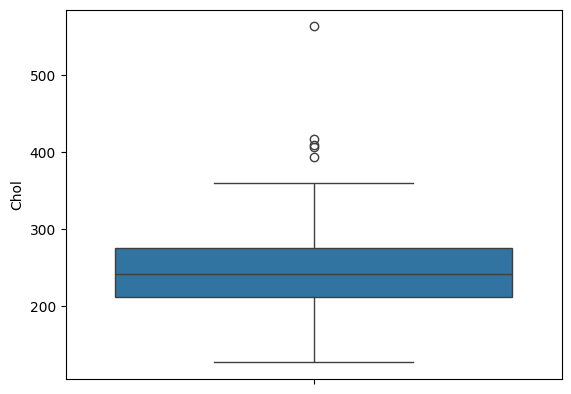

In [58]:
sns.boxplot(df_heart["Chol"])
df_heart["Chol"].describe()

In [59]:
df_heart["Chol"].skew()

1.1355031533363453

<Axes: xlabel='ChestPain', ylabel='count'>

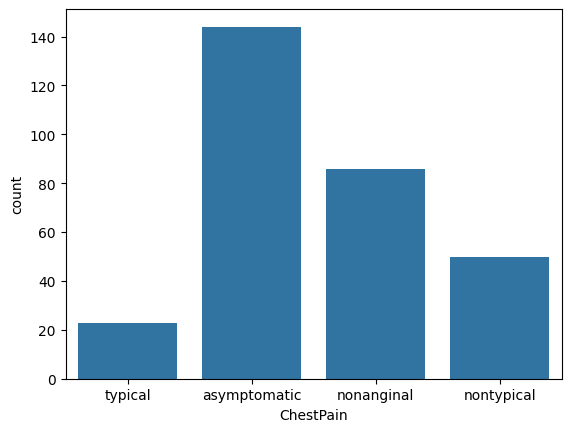

In [60]:
sns.countplot(df_heart, x ="ChestPain")

#### Data Set 2 - Students

In [61]:
df_students = pd.read_csv('StudentsPerformance.csv')
df_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='math score', ylabel='Count'>

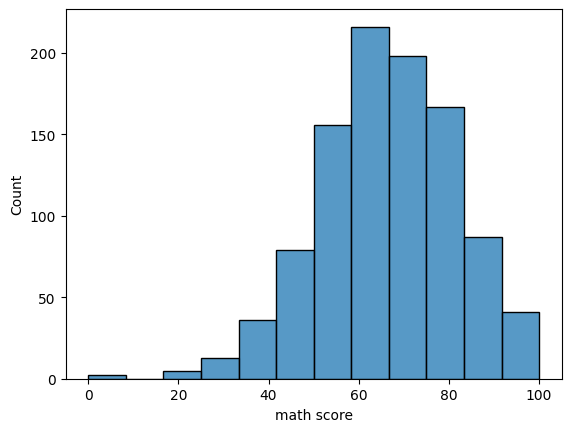

In [62]:
sns.histplot(df_students["math score"], bins=12)

In [63]:
df_students["math score"].skew()

-0.27893514909431694

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

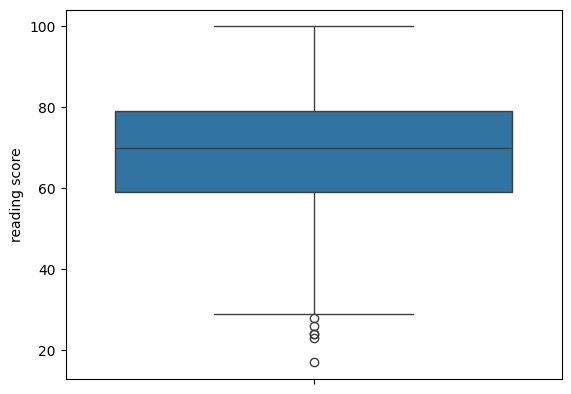

In [64]:
sns.boxplot(df_students["reading score"])
df_students["reading score"].describe()

<Axes: xlabel='race/ethnicity', ylabel='count'>

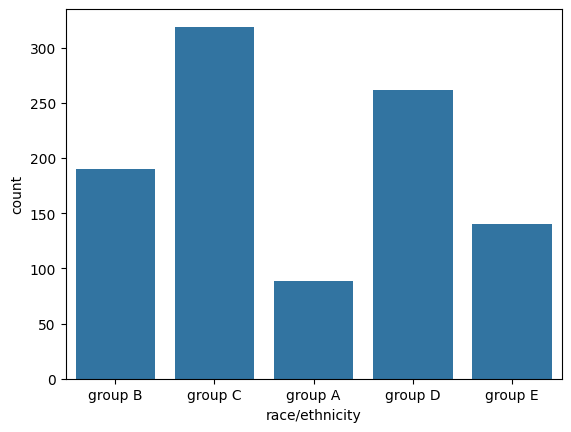

In [65]:
sns.countplot(df_students, x = "race/ethnicity")

#### Data Set 3 - Indians Diabetes

In [66]:
df_diabetes = pd.read_csv('indians-diabetes.csv',
                          names=['Pregnancies','Glucose','BloodPressure',
                                 'SkinThickness','Insulin','BMI',
                                 'DiabetesPedigreeFunction','Age','Outcome'])
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Age', ylabel='Count'>

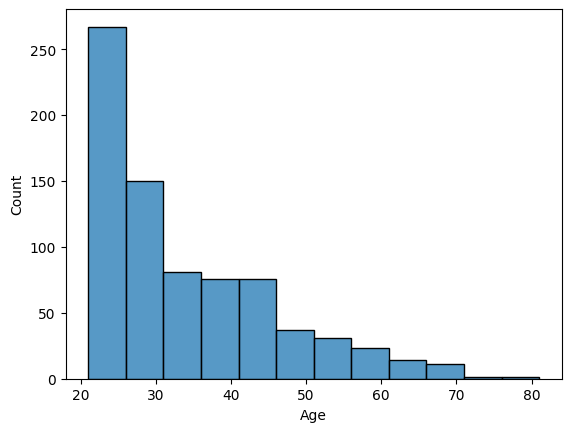

In [67]:
sns.histplot(df_diabetes["Age"], bins=12)

In [68]:
df_diabetes["Age"].skew()

1.1295967011444805

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

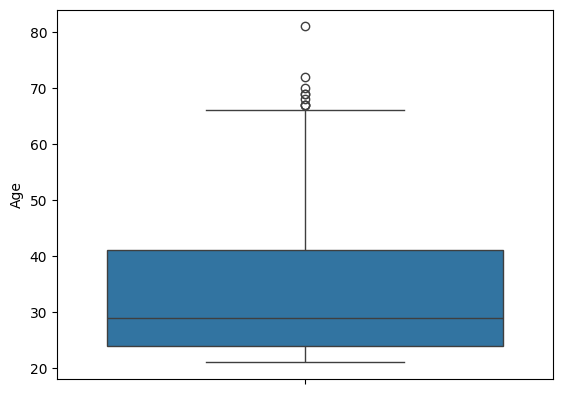

In [69]:
sns.boxplot(df_diabetes["Age"])
df_diabetes["Age"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

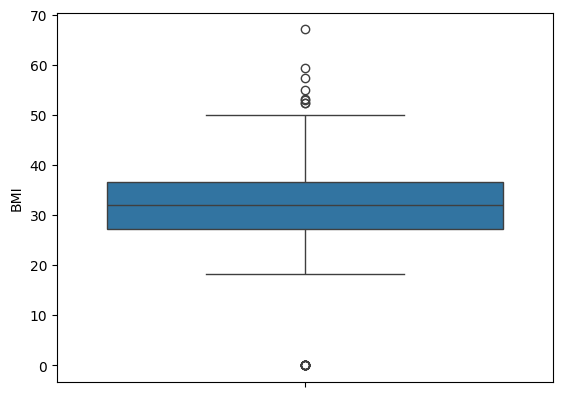

In [70]:
sns.boxplot(df_diabetes["BMI"])
df_diabetes["BMI"].describe()

<Axes: xlabel='Pregnancies', ylabel='count'>

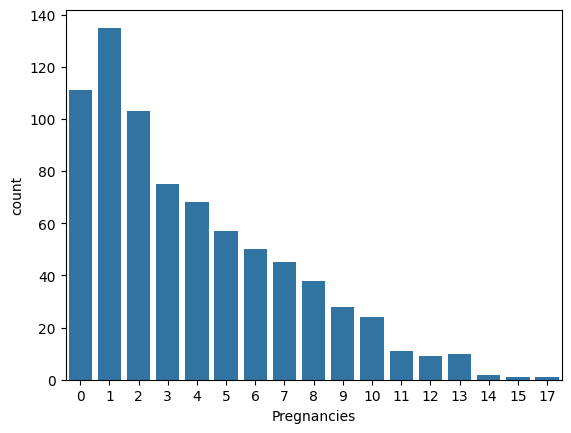

In [71]:
sns.countplot(df_diabetes, x ="Pregnancies")

<Axes: xlabel='Outcome', ylabel='count'>

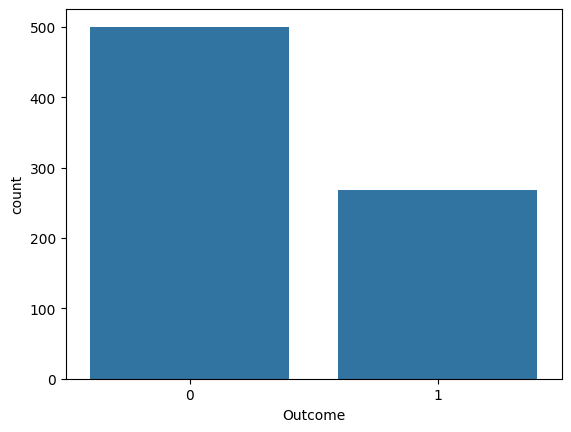

In [72]:
sns.countplot(df_diabetes, x = "Outcome")

# Exercise 3
## Question: Datasets
On the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets.php) identify two datasets with 1000 or less instances (records) that are relevant for a classification task and identify an additional two datasets with 1000 or less instances (records) that are relevant to a regression task.

How could these datasets be loaded into your notebook via Pandas? Show some example code to create your dataframes.

### Sample Answer

#### Classification Set 1 - Breast Cancer
###### https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

In [73]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data", header=None, names=["Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"])
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no



#### Classification Set 2 - HCV
###### https://archive.ics.uci.edu/ml/datasets/HCV+data

In [74]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#### Regression Set 1 - Auto MPG
###### https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [75]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep="\s+", header=None, names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Regression Set 2 - Real Estate Valuation
###### https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [76]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# Exercise 4
## Question: Levels of measure
**Differentiating between levels of measure**

Which of the following temperature scale measures are interval and which are ratio, explain your answer
*   Celsius
*   Fahrenheit
*   Kelvin



### Sample answer

<details><summary>Click here for the solution</summary>
* Celcius and farenheit are both interval measures, as they allow values that are below 0. The scale used denotes a defined '0' value, and values for other measures are relative to this value.

* Kelvin is an example of a ratio measure, as it has a true 0 value which the temperature cannot dip below.

* Celsius and Fahrenheit are both interval because they do not have a "true zero point" indicating a lack of temperature, whereas the 0 point on the Kelvin scale indicates an "absolute zero"

* Celcius and farenheit are both interval measures, as they allow values that are below 0. The scale used denotes a defined '0' value, and values for other measures are relative to this value.

* Kelvin is an example of a ratio measure, as it has a true 0 value which the temperature cannot dip below.

</details>




# Exercise 5
## Question: Levels of measure
**Choosing an appropriate statistical data type / level of measure**

What could be an appropriate statistical data type / level of measure choice for the following attributes? Explain your choice of type (nominal/categorical, ordinal, interval, ratio)


*   quality on the wine data set (df_wine)
*   quality_ind on the wine data set (df_wine)
*   alcohol on the wine data set (df_wine)
*   Fare on the titanic data set (df_titanic)
*   Survived on the titanic data set (df_titanic)



### Sample Answer

<details><summary>Click here for the solution</summary>

#### quality on the wine data set (df_wine):
This series contains ordinal data. The values are defined and can be considered as 'categories', but they also follow an order.

#### quality_ind on the wine data set (df_wine):
This series contains categorical data. Each value is ether 'Low' or 'High', splitting the results into one of two categories.

#### alcohol on the wine data set (df_wine):
This series contains continuous data, which has a defined '0' point, and therefore a ratio type is most appropriate.

#### Fare on the titanic data set (df_titanic):
This series contains continuous data, which has a defined '0' point, and therefore a ratio type is most appropriate.

#### Survived on the titanic data set (df_titanic):
This series contains data with either a value of 0, or a value of 1. Therefore, the data is categorical, as each record has one of two possible values.

</details>


# Exercise 6
## Question: Levels of measure
**Nominal vs Ordinal**

How is a nominal / categorical scale different to an ordinal scale? What impact does this have on what analysis / processing can be performed on the data?

### Sample answer

<details><summary>Click here for the solution</summary>

Nominal/categorical data is data which is labelled in some way. This data has no natural ordering, and as such, no result can be considered to be 'better', or 'greater' than another. Such comparisons are not possible.

Ordinal data, on the other hand, does have a natural order. It's possible to make comparisons such as > or < between records as a result. It's also feasible to plot such data using a chart such as a histogram, which would not be suitable for nomical/categorical data.

Nominal/categorical data is data which is labelled in some way. This data has no natural ordering, and as such, no result can be considered to be 'better', or 'greater' than another. Such comparisons are not possible.

Ordinal data, on the other hand, does have a natural order. It's possible to make comparisons such as > or < between records as a result. It's also feasible to plot such data using a chart such as a histogram, which would not be suitable for nomical/categorical data.
A nominal scale variable suggests that the attribute of interest is only differentiable from others based on its name / category whereas an ordinal scale variable implies the presence of a rank or order between the values.

An example of some nominal variables could be:
*   Gender {Male, Female, }
*   Nationality {British, American, Irish, Indian, Pakistani, ...}
*   Religion {Christian, Muslim, Jewish, Hindu, Sikh, Buddhist, Non-Religious, Other}
*   UK Domicile status {Domiciled, Non-Domiciled}

An example of some ordinal variables could be:

*   Drink sizes {Small, Medium, Large}
*   Degree classification {1st, 2-1, 2-2, 3rd, Fail}




</details>


# Exercise 7
## Question: Levels of measure
**Interval vs Ratio**

How is an interval scale different to a ratio scale? What impact would this have on what analysis / processing can be performed on the data?

### Sample answer
<details><summary>Click here for the solution</summary>
Students would be expected to discuss the need for a **true zero point** with ratio scale data and compare this with interval scale values which do not require a **true zero point**



A ratio scale has a 'true' value of 0, which is the lowest possible value. An interval scale can have negative values, and an arbitrary 0 value. This impacts the scale that is relevent for each data set.

</details>


# Exercise 8
## Question: Levels of measure
What is an appropriate "level of measure" for the Sepal Width in the Iris data set? Explain your answer.

### Sample answer

<details><summary>Click here for the solution</summary>
Students would be expected to discuss the fact that Sepal Width in cm would have a **true zero point** and therefore would be best treated as ratio scale data

Ratio is an appropriate level of measure for sepal width, as it has a defined '0' value and is a continuous data set.

A ratio scale has a 'true' value of 0, which is the lowest possible value. An interval scale can have negative values, and an arbitrary 0 value. This impacts the scale that is relevent for each data set.

</details>





# Exercise 9
## Question: Levels of measure

What is an appropriate level of measure for the "MaxHR" maximum heart-rate in the Heart dataset? Explain your answer

### Sample answer


<details><summary>Click here for the solution</summary>
Again, Students would be expected to discuss the fact that Maximum heart-rate would have a **true zero point** and therefore would be best treated as ratio scale data

For maximum heart rate, a ratio level of measure is appropriate as all values have a true 0 value, and the relationship between values are relative to the 0 value.

</details>




# Exercise 10
## Question: Levels of measure

What are the appropriate levels of measure for each variable / attribute in your group's chosen dataset? Explain your answer

### Sample answer
<details><summary>Click here for the solution</summary>

#### Coursework data set required
</details>

# Exercise 11
## Question: Data Distributions
By creating a box and whisker plot of AirBNB's AGE variable / attribute, what can this tell us about the data?

### Sample Answer


There are outliers well outside the expected range of a user's age. Possibly suggesting that we have some issues with data quality.

<details><summary>Click here for the solution</summary>

```python
df_airbnb = pd.read_csv('/content/drive/MyDrive/CMP7161/datasets/airbnb.csv')
plt.figure(figsize=(30,10))
sns.boxplot(df_airbnb["AGE"],  orient="h")
df_airbnb

```

</details>

This data contains a huge amount of outliers, some of which are very extreme. We can see that the data is 'unclean' and likely to contain errors to give such extreme values.

# Exercise 12
## Question: Measures of central tendency and data dispersion
Why might it be innappropriate to try to find the mean or median value of the following attributes? Attempt to generate the mean and median values for each and use this to explain your answer.
*   Species on the Iris data-set
*   Survived on the titanic data set
*   Pclass on the titanic data set





### Sample Answer

In [ ]:
# Due to the string encoding of 'Species' on the iris data set from iris.data,
# mean and median calculations will result in type errors within Python.
# Mode would be a far more useful measure here.
# sns.countplot(df_iris['Species'])
# df_iris['Species'].mean() = Type error
# df_iris['Species'].median() = Type error
# df_iris['Species'].mode()

# While Pclass is encoded numerically on titanic,
# despite being a categorical (or possibly even ordinal) variable
# this means that Pandas will think that mean and median are valid operations
# that could be performed on the data
# However, such measures of central tendency does not make sense with this kind of attribute
# mode would be a far more useful measure here
#sns.countplot(df_titanic['Pclass'])
# df_titanic['Pclass'].mean() = 2.308641975308642
# df_titanic['Pclass'].median() = 3.0
# df_titanic['Pclass'].mode()  = 3

# Survived is a nominal / categorical variable (technically dichotomous)
# However it is encoded numerically within the Data Frame
# this means that Pandas will think that mean and median are valid operations
# that could be performed on the data
# sns.countplot(df_titanic['Survived'])
# df_titanic['Survived'].mean() # = 0.3838383838383838
# df_titanic['Survived'].median() = 0.0
# df_titanic['Survived'].mode() = 0


In [77]:
df_iris = pd.read_csv('iris.data',
                        names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])


In [ ]:
#  df_iris["Species"].mean()

In [ ]:
# df_iris["Species"].median()

Mode is not suitable for the "Species" attribute as the data is categorical/nominal. There's no connection between the values, and it's not possible to find an average as a result. In this case, the data is also formed of strings.

Median is not suitable for this attribute as no value is returned. Median requires numerical data, and this data is formed of strings. An error is returned when trying to calculate the median for this reason. It's not possible to find a midpoint between to strings (if required).

#### Survived on the Titanic Data Set

In [78]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic["Survived"].mean()

0.3838383838383838

In [79]:
df_titanic["Survived"].median()

0.0

In this case, mode is not suitable as the data is categorical/nominal. It's possible to calculate a result due to the data being numeric, but it has no meaning as it falls between the two possible categories. At best, it simply shows which of the two values is more common.

When using categorical data, the median is inappropriate as it is essentially meaningless. With only two possible outcomes, in this case the value will match the mean.

#### Pclass on the Titanic Data Set

In [80]:
df_titanic["Pclass"].mean()

2.308641975308642

In [81]:
df_titanic["Pclass"].median()

3.0

# Exercise 13
## Question: Measures of central tendency and data dispersion
State which of the following are measures of central tendency and which are measures of data dispersion


*   Mean
*   Standard Deviation
*   Variance
*   Mode
*   Range
*   Median





### Sample Answer

*   Mean = Central tendency
*   Standard Deviation = Data dispersion
*   Variance = Data dispersion
*   Mode = Central tendency
*   Range = Data dispersion
*   Median = Central tendency


#### Mean
Mean is a measure of central tendency, as it calculates the average value of the data set.

#### Standard Deviation
Standard deviation is a measure of the dispersion of the data, as it calculates the average deviation between results across the data set. A higher value signifies greater dispersion.

#### Variance
Variance is a measure of the square of each deviation in the data set. It is closely linked to standard deviation, which is the square root of the variance. This is another measure of dispersion, as a greater result indicates a wider spread of values.

#### Mode
Mode is a measure of central tendency, as it returns the most common value. This will create a 'peak' in the data set in a distribution graph.

#### Range
Range is a measure of data dispersion, as it denotes the maximum and minimum values. A wider range is indicative of a greater degree of data dispersion.

#### Median
Media is a measure of central tendency, as it returns the middle value in the data set.

# Exercise 14
## Question: Measures of central tendency and data dispersion
When comparing the average earnings of citizens in various countries, what benefits would comparing median incomes have over comparing mean incomes?

## Sample Answer

When comparing the mean, a few very large values will create a positive skew in the data set, and raise the mean value. The median will see a much smaller impact from these few large values, and give a value which is more representative of the dataset.

## Question: Measures of central tendency and data dispersion
Consider how you would calculate appropriate measures of central tendency and data dispersion for the attribute's in your group's dataset.

For each attribute / variable:
*   What measures of central tendency could you use?
  * What would be the appropriate code to calculate these?
*   What measures of data dispersion could you use?
  * What would be the appropriate code to calculate these?

